<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/deep_learning/3_1_TF2_Classification_%26_Adv_(Keras_Basic_%26_AutoKeras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, losses

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [3]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_data.shape) # # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000

(60000, 28, 28)
(10000, 28, 28)


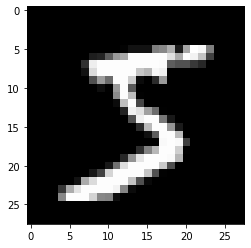

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray') # 60000장의 train data 중 첫번째 data

#### Normalization

In [6]:
# 각 이미지(28px * 28px)는 0~255 사이의 숫자로 이루어져 있습니다.

print(train_data.min())
print(train_data.max()) 

0
255


In [7]:
# 각 이미지를 [28행 x 28열]에서 [1행 x 784열]로 펼쳐줍니다. 
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줍니다.

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

In [8]:
train_data.shape

(60000, 784)

#### One-hot encoding

In [9]:
# 각 이미지에 대한 label은 integer value로 이루어져 있습니다.

train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# 각 label을 integer value에서 one-hot vector로 변경해줍니다. (Tensorflow 2.x 활용)

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [11]:
# 기존의 integer label들이 아래와 같은 one-hot vector들로 변경된 것을 확인할 수 있습니다.

import pandas as pd

pd.DataFrame(train_label).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<br> 

#### 2. Build the model & Set the criterion

In [12]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

In [13]:
model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform')) # Dense-layer (relu & he)
model.add(layers.Dropout(0.2)) # Dropout-layer
model.add(layers.Dense(units=10, activation='softmax')) # (Output) Dense-layer with softmax function, 0~9 -> 10

In [14]:
# "Compile" the model description (Configures the model for training)
model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, # See other available losses @ https://keras.io/losses/
              metrics=['accuracy']) # TF 2.X 에서 Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

<br> 

#### 3. Train the model

In [15]:
# Fit the model on training data

model.fit(train_data, train_label, batch_size=100, epochs=10) # default batch_size = 32

Epoch 1/10
600/600 [==============================] - 10s 15ms/step - loss: 0.2697 - accuracy: 0.9217
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1132 - accuracy: 0.9670
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0803 - accuracy: 0.9758
Epoch 4/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0593 - accuracy: 0.9819
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0462 - accuracy: 0.9857
Epoch 6/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0374 - accuracy: 0.9886
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0315 - accuracy: 0.9901
Epoch 8/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0270 - accuracy: 0.9913
Epoch 9/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0220 - accuracy: 0.9933
Epoch 10/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0197 - accuracy: 0.99

<br> 

#### 4. Test the model

In [16]:
# Evaluate the model on test data

result = model.evaluate(test_data, test_label, batch_size=100)

100/100 [==============================] - 1s 4ms/step - loss: 0.0603 - accuracy: 0.9826


In [17]:
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

loss (cross-entropy) : 0.06030347943305969
test accuracy : 0.9825999736785889


<br>

### (Appendix 1) tf.keras.layers.Flatten() 활용법

In [18]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

# 아래 코드에서 reshape 적용을 생략하고, 대신 Flatten 레이어를 활용해 펼쳐낼 수 있습니다.
# train_data = train_data.reshape(60000, 784) / 255.0
# test_data = test_data.reshape(10000, 784) / 255.0

train_data = train_data / 255.0
test_data = test_data / 255.0

train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)


model = models.Sequential() 

model.add(layers.Flatten()) # takes our 28x28 and makes it 1x784

# model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform')) 
model.add(layers.Dense(units=512, activation=tf.nn.relu, kernel_initializer='he_uniform')) # tf.nn 활용이 가능합니다.
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=10, activation=tf.nn.softmax)) # tf.nn 활용이 가능합니다.

model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(train_data, train_label, batch_size=100, epochs=10) 

result = model.evaluate(test_data, test_label, batch_size=100)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/10
600/600 [==============================] - 6s 9ms/step - loss: 0.2679 - accuracy: 0.9231
Epoch 2/10
600/600 [==============================] - 6s 11ms/step - loss: 0.1147 - accuracy: 0.9665
Epoch 3/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0793 - accuracy: 0.9758
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0598 - accuracy: 0.9817
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0492 - accuracy: 0.9846
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0387 - accuracy: 0.9884
Epoch 7/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0320 - accuracy: 0.9898
Epoch 8/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0256 - accuracy: 0.9920
Epoch 9/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 10/10
100/100 [==============================] - 1s 5ms/step - loss: 0.0645 - accuracy: 0.981

<br>

### (Appendix 2) AutoKeras 활용법 (https://autokeras.com/)

**\* <span style="color:blue;">AutoKeras보다 더 유용한 도구인 Keras-Tuner를 곧 학습할 예정입니다.</span>**

\* PyTorch 및 AutoKeras 설치 & AutoKeras fitting 과정에 시간이 무척 많이 소요됩니다.
<br>\* 개발환경이 영향을 받을 수 있으니 아래 코드는 **<span style="color:red;">Google Colab 에서 실행</span>**하시는 것을 적극 권장합니다. (혹은 Conda 가상환경 활용)
<br>\* 금일 실습을 마치고 추후 복습하실 때 살펴보세요.
<br><br>

1) 먼저 OS에 맞는 pytorch를 설치해주어야 합니다. (available pip whl files @ https://goo.gl/uYVaPa)

>conda install pytorch torchvision torchaudio cpuonly -c pytorch

2) 그 다음 아래 명령어로 AutoKeras를 설치해줍니다.

> pip install autokeras

In [19]:
from keras import datasets, models, layers, utils
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [ ]:
import autokeras as ak

model = ak.ImageClassifier() # It searches CNN architectures for the best configuration for the image dataset.
model.fit(train_data, train_label, time_limit=3600) # time_limit: The time limit for the search in seconds.

accuracy = model.evaluate(test_data, test_label)
result = model.predict(test_data)

print(accuracy)
print(result)

<br>

#### Appendix 
- Automated Machine Learning with Auto-Keras @ http://j.mp/2xeG2c2
- Keras vs PyTorch @ https://goo.gl/ar5VPB